<a href="https://colab.research.google.com/github/cminy/FC2022code/blob/main/APG_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import matplotlib as plt

In [ ]:
mpg_origin = pd.read_csv('/content/drive/MyDrive/001 Work/001_02 실습조교_패스트캠퍼스B2B/220426_아모레퍼시픽/아모레퍼시픽_Python 데이터 분석 과정_강의자료(김영우 강사)/01_data/mpg.csv')
mpg_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [ ]:
mpg = mpg_origin.copy()

In [ ]:
mpg = mpg.rename(columns = {'manufacturer':'company'})
mpg.head(2)

,company,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact


In [ ]:
mpg['total'] = (mpg['cty']+mpg['hwy'])/2
mpg.head(2)

,company,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0


In [ ]:
# 중첩조건문 - 연비 등급 변수 만들기
mpg['grade'] = np.where(mpg['total']>=30, 'A',
                        np.where(mpg['total']>=20, 'B',
                                 'C'))
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   company   234 non-null    object 
 1   model     234 non-null    object 
 2   displ     234 non-null    float64
 3   year      234 non-null    int64  
 4   cyl       234 non-null    int64  
 5   trans     234 non-null    object 
 6   drv       234 non-null    object 
 7   cty       234 non-null    int64  
 8   hwy       234 non-null    int64  
 9   fl        234 non-null    object 
 10  category  234 non-null    object 
 11  total     234 non-null    float64
 12  grade     234 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 23.9+ KB


In [ ]:
count_grade = mpg['grade'].value_counts()
count_grade

B    118
C    106
A     10
Name: grade, dtype: int64

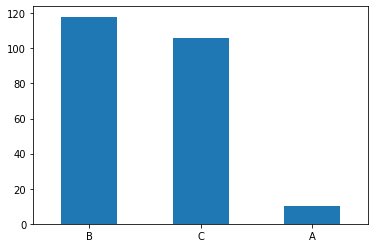

In [ ]:
count_grade.plot.bar(rot=0)

In [ ]:
# 알파벳 순으로 막대 정렬하기
count_grade = mpg['grade'].value_counts().sort_index()
count_grade

A     10
B    118
C    106
Name: grade, dtype: int64

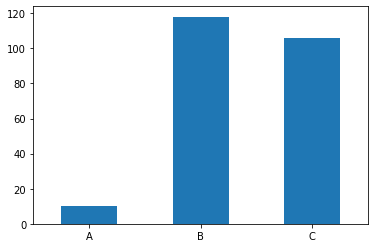

In [ ]:
count_grade.plot.bar(rot=0)

In [ ]:
# 원하는 만큼 범주 만들기
mpg['grade2'] = np.where(mpg['total'] >= 30, 'A',
                np.where(mpg['total'] >= 25, 'B',
                np.where(mpg['total'] >= 20, 'C', 'D')))

In [ ]:
mpg['size'] = np.where((mpg['category']=='compact')\
                       |(mpg['category']=='subcompact')\
                       |(mpg['category']=='2seater'),"small","large")
mpg['size'].value_counts()

large    147
small     87
Name: size, dtype: int64

In [ ]:
# isin()으로 줄이기
mpg['size2'] = np.where(mpg['category'].isin(['compact', 'subcompact', '2seater']), 'small', 'large')
mpg['size2'].value_counts()

large    147
small     87
Name: size2, dtype: int64

In [ ]:
# 156p 분석도전
midwest = pd.read_csv('/content/drive/MyDrive/001 Work/001_02 실습조교_패스트캠퍼스B2B/220426_아모레퍼시픽/아모레퍼시픽_Python 데이터 분석 과정_강의자료(김영우 강사)/01_data/midwest.csv')
midwest.describe()

,PID,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,popother,percwhite,...,perchsd,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro
count,437.000000,437.000000,4.370000e+02,437.000000,4.370000e+02,4.370000e+02,437.000000,437.000000,437.000000,437.000000,...,437.000000,437.000000,437.000000,4.370000e+02,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000
mean,1437.338673,0.033169,9.613030e+04,3097.742985,8.183992e+04,1.102388e+04,343.109840,1310.464531,1612.931350,95.558441,...,73.965546,18.272736,4.447259,9.364228e+04,97.110267,12.510505,16.447464,10.918798,11.389043,0.343249
std,876.390266,0.014679,2.981705e+05,7664.751786,2.001966e+05,7.895827e+04,868.926751,9518.394189,18526.540699,7.087358,...,5.843177,6.261908,2.408427,2.932351e+05,2.749863,5.150155,7.228634,5.109166,3.661259,0.475338
min,561.000000,0.005000,1.701000e+03,85.050000,4.160000e+02,0.000000e+00,4.000000,0.000000,0.000000,10.694087,...,46.912261,7.336108,0.520291,1.696000e+03,80.902441,2.180168,1.918955,1.938504,3.547067,0.000000
25%,670.000000,0.024000,1.884000e+04,622.407407,1.863000e+04,2.900000e+01,44.000000,35.000000,20.000000,94.886032,...,71.325329,14.113725,2.997957,1.836400e+04,96.894572,9.198715,11.624088,7.668009,8.911763,0.000000
50%,1221.000000,0.030000,3.532400e+04,1156.208330,3.447100e+04,2.010000e+02,94.000000,102.000000,66.000000,98.032742,...,74.246891,16.797562,3.814239,3.378800e+04,98.169562,11.822313,15.270164,10.007610,10.869119,0.000000
75%,2059.000000,0.038000,7.565100e+04,2330.000000,7.296800e+04,1.291000e+03,288.000000,401.000000,345.000000,99.074935,...,77.195345,20.549893,4.949324,7.284000e+04,98.598636,15.133226,20.351878,13.182182,13.412162,1.000000
max,3052.000000,0.110000,5.105067e+06,88018.396600,3.204947e+06,1.317147e+06,10289.000000,188565.000000,384119.000000,99.822821,...,88.898674,48.078510,20.791321,5.023523e+06,99.860384,48.691099,64.308477,43.312464,31.161972,1.000000


In [ ]:
midwest.size

12236

In [ ]:
midwest.head(10)

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,19.631392,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,11.243308,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,17.033819,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,17.278954,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,14.475999,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR
5,566,BUREAU,IL,0.050,35688,713.760000,35157,50,65,195,...,18.904624,3.275891,35107,98.372002,10.399635,14.158819,8.179287,11.008586,0,AAR
6,567,CALHOUN,IL,0.017,5322,313.058824,5298,1,8,15,...,11.917388,3.209601,5241,98.478016,15.149781,13.787761,12.932331,21.085271,0,LAR
7,568,CARROLL,IL,0.027,16805,622.407407,16519,111,30,61,...,16.197121,3.055727,16455,97.917287,11.710726,17.225462,10.027037,9.525052,0,AAR
8,569,CASS,IL,0.024,13437,559.875000,13384,16,8,23,...,14.107649,3.206799,13081,97.350599,13.875086,17.994784,11.914343,13.660180,0,AAR
9,570,CHAMPAIGN,IL,0.058,173025,2983.189660,146506,16559,331,8033,...,41.295808,17.757448,154934,89.544286,15.572437,14.132234,17.562728,8.105017,1,HAU


In [ ]:
midwest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PID                   437 non-null    int64  
 1   county                437 non-null    object 
 2   state                 437 non-null    object 
 3   area                  437 non-null    float64
 4   poptotal              437 non-null    int64  
 5   popdensity            437 non-null    float64
 6   popwhite              437 non-null    int64  
 7   popblack              437 non-null    int64  
 8   popamerindian         437 non-null    int64  
 9   popasian              437 non-null    int64  
 10  popother              437 non-null    int64  
 11  percwhite             437 non-null    float64
 12  percblack             437 non-null    float64
 13  percamerindan         437 non-null    float64
 14  percasian             437 non-null    float64
 15  percother             4

In [ ]:
midwest = midwest.rename(columns = {'poptotal':'total',\
                                    'popasian':'asian'})
midwest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PID                   437 non-null    int64  
 1   county                437 non-null    object 
 2   state                 437 non-null    object 
 3   area                  437 non-null    float64
 4   total                 437 non-null    int64  
 5   popdensity            437 non-null    float64
 6   popwhite              437 non-null    int64  
 7   popblack              437 non-null    int64  
 8   popamerindian         437 non-null    int64  
 9   asian                 437 non-null    int64  
 10  popother              437 non-null    int64  
 11  percwhite             437 non-null    float64
 12  percblack             437 non-null    float64
 13  percamerindan         437 non-null    float64
 14  percasian             437 non-null    float64
 15  percother             4

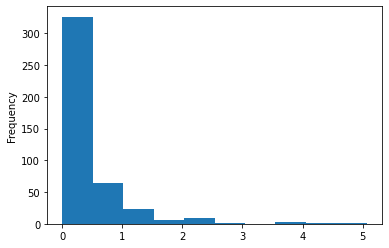

In [ ]:
midwest['po_asian']=(midwest['asian']/midwest['total'])*100
midwest['po_asian']
midwest['po_asian'].plot.hist();

In [ ]:
midwest['size']=np.where(midwest['po_asian']>midwest['po_asian'].mean(),"large","small")
midwest['size'].head(10)

0    small
1    small
2    small
3    small
4    small
5    large
6    small
7    small
8    small
9    large
Name: size, dtype: object

In [ ]:
midwest['size'].value_counts()

small    318
large    119
Name: size, dtype: int64

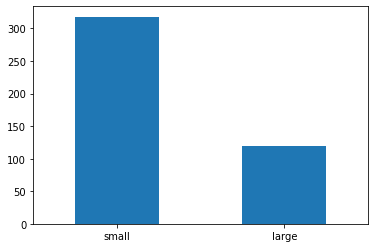

In [ ]:
midwest['size'].value_counts().plot.bar(rot=0)

# Part 2

Pandas
- query() 행 추출
- df[] 열(변수) 추출
- sort_values 정렬
- assign() 변수 추가
- groupby() 집단별로 나누기
- agg() 통계치 구하기
- merge() 데이터 합치기(열)
- concat() 데이터 합치기(행)

In [ ]:
exam = pd.read_csv('/content/drive/MyDrive/001 Work/001_02 실습조교_패스트캠퍼스B2B/220426_아모레퍼시픽/아모레퍼시픽_Python 데이터 분석 과정_강의자료(김영우 강사)/01_data/exam.csv')
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [ ]:
exam.query('nclass==1')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [ ]:
exam.query('nclass!=2').head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15


In [ ]:
exam.query('math > 50')

,id,nclass,math,english,science
1,2,1,60,97,60
6,7,2,80,90,45
7,8,2,90,78,25
10,11,3,65,65,65
14,15,4,75,56,78
15,16,4,58,98,65
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87
19,20,5,78,83,58


In [ ]:
exam.query('nclass==1 & math>=50')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60


In [ ]:
exam.query('math>=90 | english>=90')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
3,4,1,30,98,58
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
12,13,4,46,98,65
15,16,4,58,98,65


In [ ]:
exam.query('nclass==1 | nclass==3 | nclass==5')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [ ]:
exam.query('nclass in [1,3,5]')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [ ]:
# 185p
# 1반과 2반의 수학점수 평균
c1 = exam.query('nclass == 1').math.mean()
c2 = exam.query('nclass == 2').math.mean()
print(c1, c2)
c3 = exam.query('nclass == 1')['math'].mean()
c4 = exam.query('nclass == 2')['math'].mean()
print(c3, c4)

46.25 61.25
46.25 61.25


In [ ]:
df = pd.DataFrame({'sex' : ['F', 'M', 'F', 'M'],
                   'country': ['Korea', 'China', 'Japan', 'USA']})
df

,sex,country
0,F,Korea
1,M,China
2,F,Japan
3,M,USA


In [ ]:
# 192p
mpg.head(5)

,company,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,grade,grade2,size,size2
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,B,C,small,small
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,B,B,small,small
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,B,B,small,small
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,B,B,small,small
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,B,C,small,small


In [ ]:
# Q1.
a1 = mpg.query('displ <=4').hwy.mean()
a2 = mpg.query('displ >=5').hwy.mean()
a1, a2

(25.96319018404908, 18.07894736842105)

In [ ]:
# Q2.
a3 = mpg.query('company == "audi"').cty.mean()
a4 = mpg.query('company == "toyota"').cty.mean()
a3, a4

(17.61111111111111, 18.529411764705884)

In [ ]:
# Q3.
a5 = mpg.query("company in ['chevrolet','ford','honda']")
# a5.head()
a5

,company,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,grade,grade2,size,size2
18,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv,17.0,C,D,large,large
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv,13.0,C,D,large,large
20,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv,17.0,C,D,large,large
21,chevrolet,c1500 suburban 2wd,5.7,1999,8,auto(l4),r,13,17,r,suv,15.0,C,D,large,large
22,chevrolet,c1500 suburban 2wd,6.0,2008,8,auto(l4),r,12,17,r,suv,14.5,C,D,large,large
23,chevrolet,corvette,5.7,1999,8,manual(m6),r,16,26,p,2seater,21.0,B,C,small,small
24,chevrolet,corvette,5.7,1999,8,auto(l4),r,15,23,p,2seater,19.0,C,D,small,small
25,chevrolet,corvette,6.2,2008,8,manual(m6),r,16,26,p,2seater,21.0,B,C,small,small
26,chevrolet,corvette,6.2,2008,8,auto(s6),r,15,25,p,2seater,20.0,B,C,small,small
27,chevrolet,corvette,7.0,2008,8,manual(m6),r,15,24,p,2seater,19.5,C,D,small,small


In [ ]:
a5.hwy.mean()

22.50943396226415

In [ ]:
# 196p
# 출력 제한 없애기
pd.set_option('display.max_rows', None)     # 모든 행 출력하도록 설정
pd.set_option('display.max_columns', None)  # 모든 열 출력하도록 설정

In [ ]:
# 원래대로 되돌리기
pd.reset_option('display.max_rows')         # 행 출력 제한 되돌리기
pd.reset_option('display.max_columns')      # 열 출력 제한 되돌리기
pd.reset_option('all') 

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



/usr/local/lib/python3.7/dist-packages/pandas/_config/config.py:630: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  warnings.warn(d.msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/pandas/_config/config.py:630: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


In [ ]:
# 199
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [ ]:
exam[['nclass','math','english']]

,nclass,math,english
0,1,50,98
1,1,60,97
2,1,45,86
3,1,30,98
4,2,25,80
5,2,50,89
6,2,80,90
7,2,90,78
8,3,20,98
9,3,50,98


In [ ]:
# 시리즈로 추출
exam['math'].head(2), type(exam['math'].head(2))

(0    50
 1    60
 Name: math, dtype: int64, pandas.core.series.Series)

In [ ]:
# dataframe으로 추출
exam[['math']].head(2), type(exam[['math']].head(2))

(   math
 0    50
 1    60, pandas.core.frame.DataFrame)

In [ ]:
# 변수 제외
exam.drop(columns='math').head()

,id,nclass,english,science
0,1,1,98,50
1,2,1,97,60
2,3,1,86,78
3,4,1,98,58
4,5,2,80,65


In [ ]:
exam.head() #math 그대로 있음

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [ ]:
# nclass가 1인 행만 추출한 다음 english 추출
exam.query('nclass == 1')['english']

0    98
1    97
2    86
3    98
Name: english, dtype: int64

In [ ]:
# 211p
# 수학점수 50점 이상 학생 id, math 추출
exam.query('math >= 50')\
[['id','math']]\
.head()
# ctr+delete #alt+cursor드래그

,id,math
0,1,50
1,2,60
5,6,50
6,7,80
7,8,90


In [ ]:
# 215p
mpg.head(2)

,company,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,grade,grade2,size,size2
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,B,C,small,small
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,B,B,small,small


In [ ]:
mpg_new = mpg[['category','cty']]
mpg_new.head()

,category,cty
0,compact,18
1,compact,21
2,compact,20
3,compact,21
4,compact,16


In [ ]:
m1 = mpg_new.query('category == "suv"')['cty'].mean()
m2 = mpg_new.query('category == "compact"')['cty'].mean()
m1, m2

(13.5, 20.127659574468087)

In [ ]:
exam.sort_values('math', ascending = False).head()

,id,nclass,math,english,science
7,8,2,90,78,25
18,19,5,89,68,87
17,18,5,80,78,90
6,7,2,80,90,45
19,20,5,78,83,58


In [ ]:
exam.sort_values(['nclass', 'math']).head()  # nclass 및 math 오름차순 정렬

,id,nclass,math,english,science
3,4,1,30,98,58
2,3,1,45,86,78
0,1,1,50,98,50
1,2,1,60,97,60
4,5,2,25,80,65


In [ ]:
exam.sort_values(['nclass', 'math'], ascending = [True, False]).head(15)

,id,nclass,math,english,science
1,2,1,60,97,60
0,1,1,50,98,50
2,3,1,45,86,78
3,4,1,30,98,58
7,8,2,90,78,25
6,7,2,80,90,45
5,6,2,50,89,98
4,5,2,25,80,65
10,11,3,65,65,65
9,10,3,50,98,45


In [ ]:
# 225p
mpg.query('company == "audi"').sort_values('hwy', ascending=False).head()

,company,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,grade,grade2,size,size2
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,B,B,small,small
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,B,B,small,small
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,B,C,small,small
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,B,B,small,small
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact,24.0,B,C,small,small


##summary

- 조건 -> .query()

- 정렬 -> .sort_values()

- 파생변수 : np.where() 또는 아래 배우는 .assign()

  - assign() 이용하면 여러개 변수를 한번에 추가할 수 있다.
  - assign() 안에도 np.where 넣을 수 있음.
  - assign()은 원본 df 바꿔주는거는 아님. 결과값만 붙여 보여주는거야.

In [ ]:
# 파생변수
# total 변수 추가
# 실제로 total , mean 변수가 추가된거는 아님. 그니까 이거 바로 활용하려면 아래 lambda 쓰는거지
exam.assign(total = exam['math'] + exam['english'] + exam['science'],\
            mean = (exam.math + exam.english + exam.science)/3)

,id,nclass,math,english,science,total,mean
0,1,1,50,98,50,198,66.000000
1,2,1,60,97,60,217,72.333333
2,3,1,45,86,78,209,69.666667
3,4,1,30,98,58,186,62.000000
4,5,2,25,80,65,170,56.666667
5,6,2,50,89,98,237,79.000000
6,7,2,80,90,45,215,71.666667
7,8,2,90,78,25,193,64.333333
8,9,3,20,98,15,133,44.333333
9,10,3,50,98,45,193,64.333333


In [ ]:
exam.assign(test = np.where(exam.science >= 60, "pass", "fail")).sort_values('test')

,id,nclass,math,english,science,test
0,1,1,50,98,50,fail
13,14,4,48,87,12,fail
11,12,3,45,85,32,fail
8,9,3,20,98,15,fail
7,8,2,90,78,25,fail
6,7,2,80,90,45,fail
9,10,3,50,98,45,fail
3,4,1,30,98,58,fail
19,20,5,78,83,58,fail
4,5,2,25,80,65,pass


In [ ]:
# lambda로 데이터프레임명 줄이기
# df명 대신 x 입력
exam.assign(total = lambda x: x['math'] + x['english'] + x['science'])

,id,nclass,math,english,science,total
0,1,1,50,98,50,198
1,2,1,60,97,60,217
2,3,1,45,86,78,209
3,4,1,30,98,58,186
4,5,2,25,80,65,170
5,6,2,50,89,98,237
6,7,2,80,90,45,215
7,8,2,90,78,25,193
8,9,3,20,98,15,133
9,10,3,50,98,45,193


In [ ]:
# 앞에서 추가한 변수 바로 활용할 때는 꼭 lambda를 쓴다
exam.assign(total = exam.math + exam.english + exam.science,\
            mean = lambda x: x.total/3)

,id,nclass,math,english,science,total,mean
0,1,1,50,98,50,198,66.000000
1,2,1,60,97,60,217,72.333333
2,3,1,45,86,78,209,69.666667
3,4,1,30,98,58,186,62.000000
4,5,2,25,80,65,170,56.666667
5,6,2,50,89,98,237,79.000000
6,7,2,80,90,45,215,71.666667
7,8,2,90,78,25,193,64.333333
8,9,3,20,98,15,133,44.333333
9,10,3,50,98,45,193,64.333333


In [ ]:
#### 답변testing
type(exam['math'])
a = [exam['math'],exam['english']]
testt = pd.DataFrame({'math' : exam['math'], 'eng' : exam['english']})
testt
b = (exam['math'],exam['english'])
type(b)
type(exam['math'])
# exam['math'][0]

pandas.core.series.Series

In [ ]:
# 239p
mpg_n = mpg.copy()
mpg_n.head(2)

,company,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,grade,grade2,size,size2
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,B,C,small,small
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,B,B,small,small


In [ ]:
mpg_n.assign(total = lambda x: x.cty + x.hwy,\
             mean = lambda x: x.total / 2).sort_values('mean', ascending = False).head(3)


,company,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,grade,grade2,size,size2,mean
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,79,A,A,small,small,39.5
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,77,A,A,small,small,38.5
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,70,A,A,small,small,35.0


In [ ]:
# 집단별 요약
exam.agg(mean_math = ('math', 'mean'))  # math 평균 산출

,math
mean_math,57.45


In [ ]:
exam.groupby('nclass')\
    .agg(mean_math = ('math', 'mean')) #nclass별로분리하고 math 평균산출

,mean_math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [ ]:
exam.groupby('nclass') \
    .agg(mean_math   = ('math', 'mean'),    
         sum_math    = ('math', 'sum'),     
         median_math = ('math', 'median'),          
         n           = ('nclass', 'count'))

,mean_math,sum_math,median_math,n
nclass,,,,
1,46.25,185,47.5,4
2,61.25,245,65.0,4
3,45.00,180,47.5,4
4,56.75,227,53.0,4
5,78.00,312,79.0,4


In [ ]:
# 변수 인덱스로 바꾸지 않기
# 그냥 두면 groupby에 들어간 변수를 idx로 사용해버림 => 변수로 인식X
exam.groupby('nclass', as_index = False) \
    .agg(mean_math = ('math', 'mean'))

,nclass,mean_math
0,1,46.25
1,2,61.25
2,3,45.00
3,4,56.75
4,5,78.00


In [ ]:
exam.groupby('nclass', as_index = False).mean()

,nclass,id,math,english,science
0,1,2.5,46.25,94.75,61.50
1,2,6.5,61.25,84.25,58.25
2,3,10.5,45.00,86.50,39.25
3,4,14.5,56.75,84.75,55.00
4,5,18.5,78.00,74.25,83.25


In [ ]:
mpg.groupby(['company', 'drv']) \
   .agg(mean_cty = ('cty', 'mean'))

mean_cty
company    drv           
audi       4    16.818182
           f    18.857143
chevrolet  4    12.500000
           f    18.800000
           r    14.100000
dodge      4    12.000000
           f    15.818182
ford       4    13.307692
           r    14.750000
honda      f    24.444444
hyundai    f    18.642857
jeep       4    13.500000
land rover 4    11.500000
lincoln    r    11.333333
mercury    4    13.250000
nissan     4    13.750000
           f    20.000000
pontiac    f    17.000000
subaru     4    19.285714
toyota     4    14.933333
           f    21.368421
volkswagen f    20.925926

In [ ]:
### 답변 testing
# goupby, agg, sort_values 순서??
### apply를 이용하거나 sort_values를 먼저 하던가. https://sparkbyexamples.com/pandas/pandas-groupby-sort-within-groups/
dftestt = mpg.groupby(['company','model'])[['category', 'total']].apply(lambda x: x.sort_values(['total', 'category'], ascending=False))
dftestt

category  total
company    model                     
audi       a4     2    compact   25.5
                  3    compact   25.5
                  1    compact   25.0
                  0    compact   23.5
                  6    compact   22.5
...                        ...    ...
volkswagen passat 228  midsize   23.5
                  229  midsize   23.5
                  232  midsize   22.0
                  233  midsize   21.5
                  231  midsize   21.0

[234 rows x 2 columns]

In [ ]:
# 257p (1), (2)
mpg.groupby(['category']).agg(mean_cty = ('cty','mean')).sort_values('mean_cty', ascending=False)

,mean_cty
category,
subcompact,20.371429
compact,20.127660
midsize,18.756098
minivan,15.818182
2seater,15.400000
suv,13.500000
pickup,13.000000


In [ ]:
# (3)(4)
mpg.head(3)

,company,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,grade,grade2,size,size2
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,B,C,small,small
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,B,B,small,small
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,B,B,small,small


In [ ]:
mpg.groupby('company').agg(mean_hwy = ('hwy','mean')).sort_values('mean_hwy', ascending=False).head(3)

,mean_hwy
company,
honda,32.555556
volkswagen,29.222222
hyundai,26.857143


In [ ]:
mpg.query('category == "compact"').groupby('company')\
.agg(n = ('company','count')).sort_values('n', ascending=False)

,n
company,
audi,15
volkswagen,14
toyota,12
subaru,4
nissan,2


In [ ]:
# 더 간단한 코드
mpg.query('category == "compact"') \
   .value_counts('company')

company
audi          15
volkswagen    14
toyota        12
subaru         4
nissan         2
dtype: int64

In [ ]:
type(mpg.query('category == "compact"') \
   .value_counts('company'))

pandas.core.series.Series

In [ ]:
# 264p
midwest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PID                   437 non-null    int64  
 1   county                437 non-null    object 
 2   state                 437 non-null    object 
 3   area                  437 non-null    float64
 4   total                 437 non-null    int64  
 5   popdensity            437 non-null    float64
 6   popwhite              437 non-null    int64  
 7   popblack              437 non-null    int64  
 8   popamerindian         437 non-null    int64  
 9   asian                 437 non-null    int64  
 10  popother              437 non-null    int64  
 11  percwhite             437 non-null    float64
 12  percblack             437 non-null    float64
 13  percamerindan         437 non-null    float64
 14  percasian             437 non-null    float64
 15  percother             4

In [ ]:
# (1)(2)
midwest.assign(ratio = (1-midwest.popadults / midwest.total) * 100)[['county','ratio']]\
.sort_values('ratio', ascending=False).head()

,county,ratio
230,ISABELLA,51.501172
404,MENOMINEE,50.591260
281,ATHENS,49.320727
247,MECOSTA,49.059183
154,MONROE,47.358182


In [ ]:
#### lambda testing #####
midwest_test = midwest.copy()
# --- (3) lambda 사용 :err
# midwest_test.assign(ratio = lambda x : (1-x['popadults']/x['total'])*100,\
#                     grade = lambda x : "large" if x['ratio'] >=40 else ("middle" if x['ratio'] < 30 else "small"))\
#                     [['county','ratio','grade']]
# ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().
# --- (2) np.where 사용 : 성공
# midwest_test.assign(ratio = lambda x : (1-x['popadults']/x['total'])*100,\
#                     grade = np.where(midwest_test.ratio>=40, "large",np.where(midwest_test['ratio'] >=30,"middle","small")))\
#                     [['county','ratio','grade']]\
#                     .sort_values('ratio')\
#                     .value_counts('grade')
# --- (3) lambda와 np.where 사용 : 성공
midwest_test.assign(ratio = lambda x : (1-x['popadults']/x['total'])*100,\
                    grade = lambda x : np.where(x.ratio>=40, "large",np.where(x['ratio'] >=30,"middle","small")))\
                    [['county','ratio','grade']]\
                    .sort_values('ratio')\
                    .value_counts('grade')
# midwest_test.info()

grade
middle    396
large      32
small       9
dtype: int64

In [ ]:
midwest['ratio'] = (1-midwest.popadults / midwest.total) * 100
midwest[['county','ratio']]\
                .sort_values('ratio', ascending=False).head()

,county,ratio
230,ISABELLA,51.501172
404,MENOMINEE,50.591260
281,ATHENS,49.320727
247,MECOSTA,49.059183
154,MONROE,47.358182


In [ ]:
# (3)(4)
midwest['r_size'] = np.where(midwest.ratio>=40, "large",\
                             np.where(midwest['ratio'] >=30,"middle","small"))
midwest.groupby('r_size').agg(n=('r_size','count'))

,n
r_size,
large,32
middle,396
small,9


In [ ]:
midwest.assign(ratio_asian = midwest['asian'] / midwest['total'] * 100) \
       .sort_values('ratio_asian') \
       .head(10) \
       [['state', 'county', 'ratio_asian']]

,state,county,ratio_asian
404,WI,MENOMINEE,0.000000
105,IN,BENTON,0.010592
109,IN,CARROLL,0.015950
358,OH,VINTON,0.027032
390,WI,IRON,0.032504
85,IL,SCOTT,0.053154
112,IN,CLAY,0.060716
261,MI,OSCODA,0.063759
340,OH,PERRY,0.066546
73,IL,PIATT,0.070749


# Part 3

In [ ]:
mpgn = mpg_origin.copy()
mpgn

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


[(10.0, 30.0), (3.0, 6.0)]

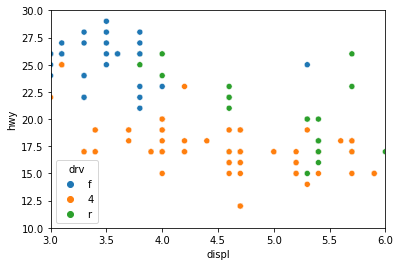

In [ ]:
sns.scatterplot(data = mpgn, x ='displ', y='hwy', hue = 'drv')\
  .set(xlim=(3,6), ylim=(10,30)) # x limit, y limit

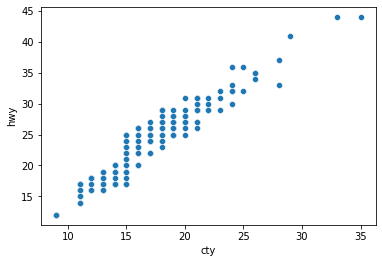

In [ ]:
sns.scatterplot(data = mpgn, x='cty', y='hwy')

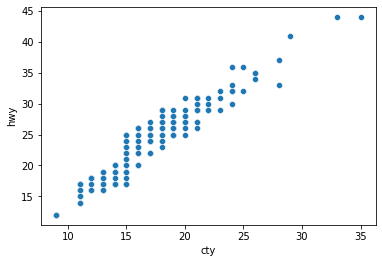

In [ ]:
# 282p
sns.scatterplot(data = mpgn, x='cty', y='hwy');

In [ ]:
midwest.head(3)

,PID,county,state,area,total,popdensity,popwhite,popblack,popamerindian,asian,...,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,po_asian,size,ratio,r_size
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,13.151443,18.011717,11.009776,12.443812,0,AAR,0.376759,small,34.486307,middle
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,32.244278,45.826514,27.385647,25.228976,0,LHR,0.451722,small,36.721250,middle
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,12.068844,14.036061,10.852090,12.697410,0,AAR,0.106731,small,35.501301,middle


[(0.0, 10000.0), (0.0, 500000.0)]

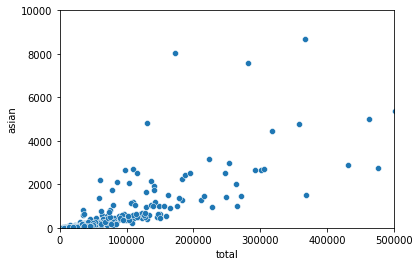

In [ ]:
sns.scatterplot(data=midwest, x='total', y='asian')\
  .set(xlim=(0,50*10000), ylim=(0,10000))

In [ ]:
plt.rcParams.update({'figure.dpi' : '150'})             # 해상도, 기본값 72
plt.rcParams.update({'figure.figsize' : [8, 6]})        # 그림 크기, 기본값 [6, 4]
plt.rcParams.update({'font.size': '15'})                # 글자 크기, 기본값 10
plt.rcParams.update({'font.family' : 'AppleGothic'})  # 폰트, 기본값 sans-serif
# # 한 번에 여러 설정 바꾸기
# plt.rcParams.update({'figure.dpi' : '150',  
#                      'figure.figsize' : [8, 6],
#                      'font.size': '15',
#                      'font.family' : 'AppleGothic'})

In [ ]:
# 그래프 설정 기본값 출력
# plt.rcParamsDefault

In [ ]:
# 설정 되돌리기
plt.rcParams.update(plt.rcParamsDefault)

In [ ]:
df_mpg = mpg.groupby('drv', as_index = False) \
            .agg(mean_hwy = ('hwy', 'mean'))
df_mpg

,drv,mean_hwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


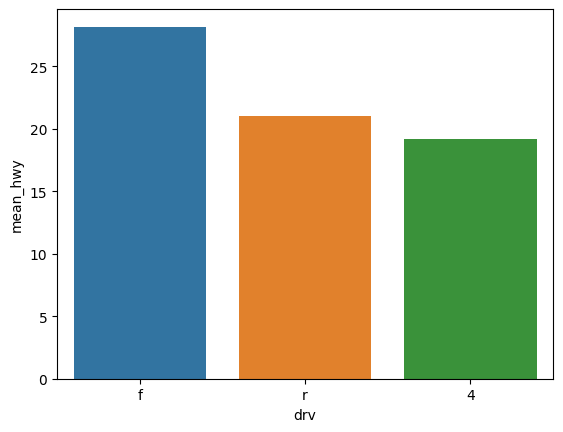

In [ ]:
df_mpg = df_mpg.sort_values('mean_hwy', ascending=False)
sns.barplot(data=df_mpg, x='drv', y='mean_hwy')

In [ ]:
# 293p
mpgn.head(2)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact


In [ ]:
### suv가 category에 있나 확인
# mpgn['category'].value_counts()
# mpgn.category.unique()
cols = mpgn.columns.unique()
find_str = 'suv'
for i in range(0,len(cols)):
  if find_str in mpgn[cols[i]].unique():
    print(cols[i])

category


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  import sys


In [ ]:
df = mpgn.query('category == "suv"')\
.groupby('manufacturer', as_index = False)\
.agg(mean_cty = ('cty','mean'))\
.sort_values('mean_cty', ascending = False)
df.head()

,manufacturer,mean_cty
8,subaru,18.833333
9,toyota,14.375000
7,nissan,13.750000
3,jeep,13.500000
6,mercury,13.250000


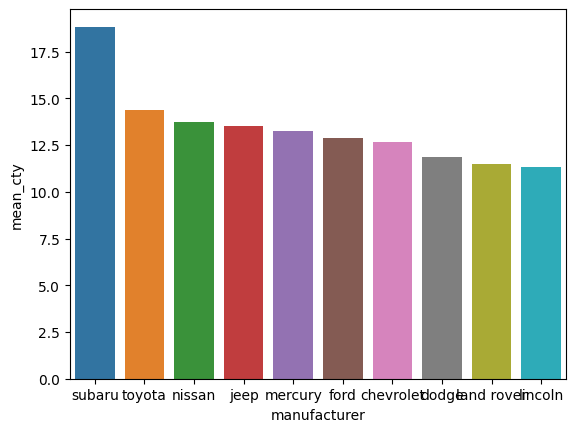

In [ ]:
sns.barplot(data = df, x = 'manufacturer', y='mean_cty');

In [ ]:
economics = pd.read_csv('/content/drive/MyDrive/001 Work/001_02 실습조교_패스트캠퍼스B2B/220426_아모레퍼시픽/아모레퍼시픽_Python 데이터 분석 과정_강의자료(김영우 강사)/01_data/economics.csv')
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


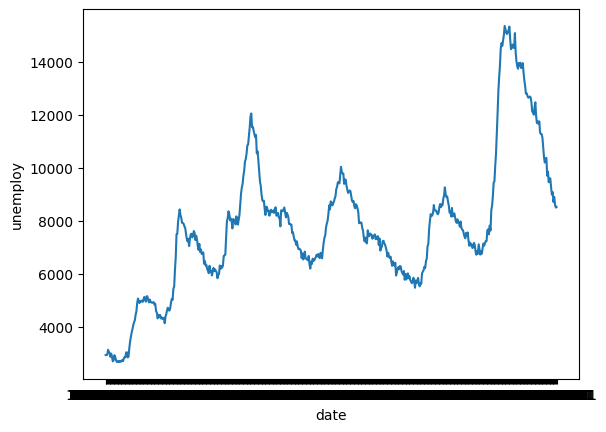

In [ ]:
sns.lineplot(data = economics, x='date', y='unemploy');

In [ ]:
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      574 non-null    object 
 1   pce       574 non-null    float64
 2   pop       574 non-null    float64
 3   psavert   574 non-null    float64
 4   uempmed   574 non-null    float64
 5   unemploy  574 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 27.0+ KB


In [ ]:
economics['date2'] = pd.to_datetime(economics['date'])
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [ ]:
economics.date2.dt.year #year대신 month, day 가능

0      1967
1      1967
2      1967
3      1967
4      1967
       ... 
569    2014
570    2015
571    2015
572    2015
573    2015
Name: date2, Length: 574, dtype: int64

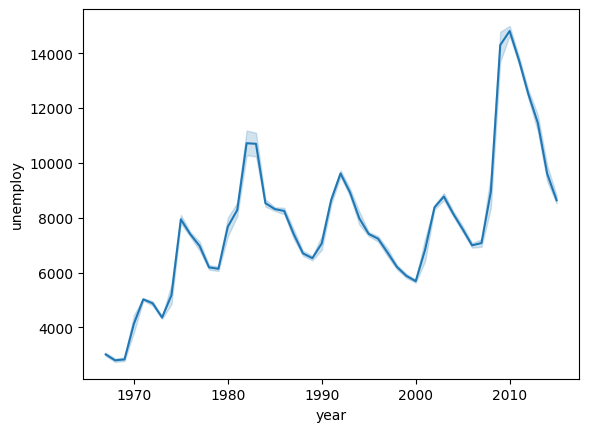

In [ ]:
economics['year'] = economics.date2.dt.year
sns.lineplot(data=economics, x='year', y='unemploy');

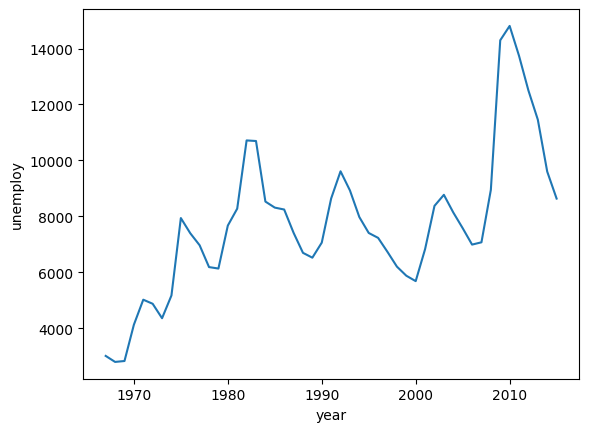

In [ ]:
sns.lineplot(data=economics, x='year', y='unemploy', ci=None);

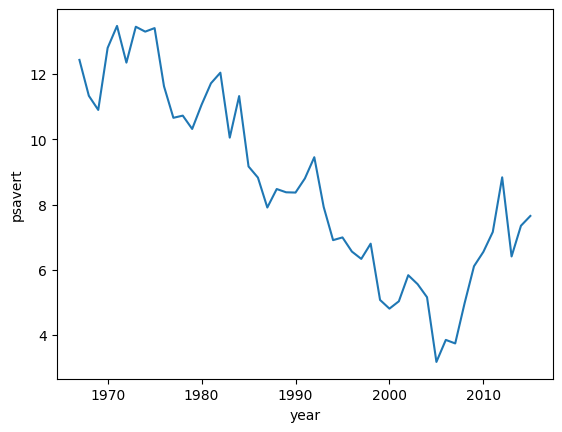

In [ ]:
# 311p
sns.lineplot(data=economics, x='year', y='psavert', ci=None)

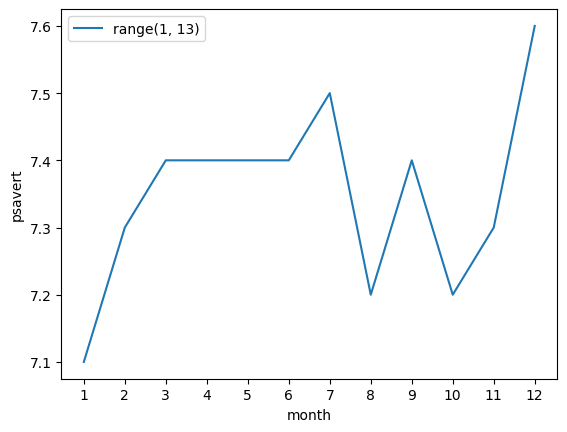

In [ ]:
economics['month'] = economics.date2.dt.month
df_2014 = economics.query('year == 2014')
sns.lineplot(data=df_2014, x='month', y='psavert', ci=None, label = range(1,13))\
  .set_xticks(ticks = range(1,13));

In [ ]:
# 상자그림 정렬 방법1
mpgn.groupby('drv').describe()['hwy'].round(1)

,count,mean,std,min,25%,50%,75%,max
drv,,,,,,,,
4,103.0,19.2,4.1,12.0,17.0,18.0,22.0,28.0
f,106.0,28.2,4.2,17.0,26.0,28.0,29.0,44.0
r,25.0,21.0,3.7,15.0,17.0,21.0,24.0,26.0


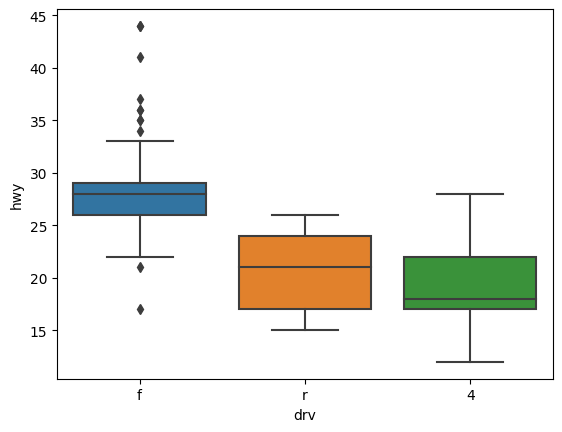

In [ ]:
sns.boxplot(data=mpgn, x='drv', y='hwy', order=['f','r','4']);

In [ ]:
# 정렬방법2
drv_order = mpgn.groupby('drv')['hwy'].median()\
  .sort_values(ascending = False)
drv_order

drv
f    28.0
r    21.0
4    18.0
Name: hwy, dtype: float64

In [ ]:
drv_order.index

Index(['f', 'r', '4'], dtype='object', name='drv')

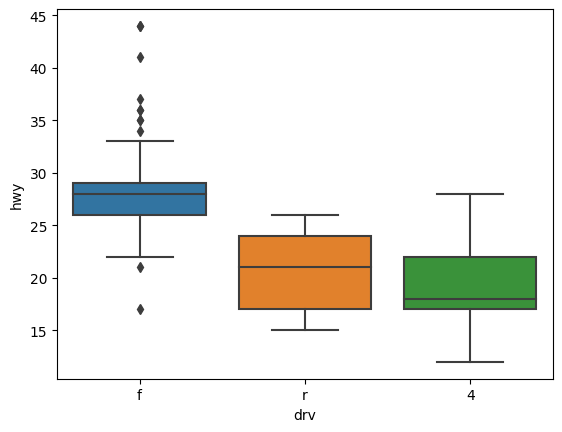

In [ ]:
sns.boxplot(data=mpgn, x='drv', y='hwy', order=drv_order.index)

In [ ]:
# 322p
mpgn.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


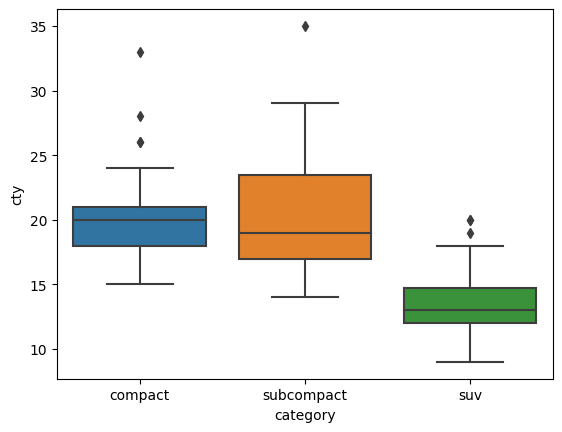

In [ ]:
df = mpgn.query('category in ["compact","subcompact","suv"]')
cty_order = df.groupby('category')['cty'].median()\
  .sort_values(ascending = False)
cty_order
sns.boxplot(data = df, x='category', y='cty', order = cty_order.index);

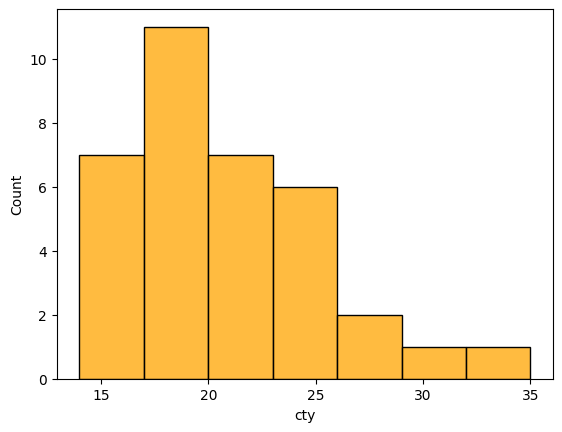

In [ ]:
### 히스토그램 그려보기
# df_testt = mpgn[mpgn.category == "subcompact"]
sns.histplot(data = mpgn[mpgn.category == "subcompact"], x='cty', color = 'orange')

# Part 6

In [ ]:
# 중간고사 데이터 생성
test1 = pd.DataFrame({'id' : [1, 2, 3, 4, 5],
                      'midterm' : [60, 80, 70, 90, 85]})
# 기말고사 데이터 생성
test2 = pd.DataFrame({'id' : [1, 2, 3, 4, 5],
                      'final' : [70, 83, 65, 95, 80]})

In [ ]:
test1

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85


In [ ]:
test2

,id,final
0,1,70
1,2,83
2,3,65
3,4,95
4,5,80


In [ ]:
# join
total = pd.merge(test1, test2, how = 'left', on='id')
total

,id,midterm,final
0,1,60,70
1,2,80,83
2,3,70,65
3,4,90,95
4,5,85,80


In [ ]:
# 333p
exam.head(2)

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60


In [ ]:
name = pd.DataFrame({'nclass' : [1, 2, 3, 4, 5],
                     'teacher' : ["kim", "lee", "park", "choi", "jung"]})
name

,nclass,teacher
0,1,kim
1,2,lee
2,3,park
3,4,choi
4,5,jung


In [ ]:
exam_new = pd.merge(exam, name, how = 'left', on='nclass')
exam_new.head()

,id,nclass,math,english,science,teacher
0,1,1,50,98,50,kim
1,2,1,60,97,60,kim
2,3,1,45,86,78,kim
3,4,1,30,98,58,kim
4,5,2,25,80,65,lee


In [ ]:
# 학생 1~5번 시험 데이터 생성
group_a = pd.DataFrame({'id' : [1, 2, 3, 4, 5],
                        'test' : [60, 80, 70, 90, 85]})
# 학생 6~10번 시험 데이터 생성
group_b = pd.DataFrame({'id' : [6, 7, 8, 9, 10],
                        'test' : [70, 83, 65, 95, 80]})

In [ ]:
# 세로 합치기 concat
group_allt = pd.concat([group_a,group_b])
group_allt

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
0,6,70
1,7,83
2,8,65
3,9,95
4,10,80


In [ ]:
# 세로 합치기 concat
group_all = pd.concat([group_a,group_b], ignore_index = True)
group_all

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
5,6,70
6,7,83
7,8,65
8,9,95
9,10,80


In [ ]:
# 341p
mpgn.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [ ]:
fl_arr = sorted(mpgn.fl.unique())
fl_arr

['c', 'd', 'e', 'p', 'r']

In [ ]:
df_fl = pd.DataFrame({'fls':fl_arr,
                      'cost_fl':[2.35, 2.38, 2.11, 2.76, 2.22]
})
df_fl

,fls,cost_fl
0,c,2.35
1,d,2.38
2,e,2.11
3,p,2.76
4,r,2.22


In [ ]:
# 컬럼 이름 같을 때
# mpgnf = pd.merge(mpgn, df_fl, how='left', on='fl')
### 컬럼 이름 다를 때
mpgnf = pd.merge(mpgn, df_fl, how='left', left_on='fl', right_on = 'fls')
mpgnf

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,fls,cost_fl
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,p,2.76
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,p,2.76
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,p,2.76
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,p,2.76
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,p,2.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,p,2.76
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,p,2.76
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,p,2.76
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,p,2.76


In [ ]:
mpgnf[['model','fl','cost_fl']].head()

,model,fl,cost_fl
0,a4,p,2.76
1,a4,p,2.76
2,a4,p,2.76
3,a4,p,2.76
4,a4,p,2.76


# Part 7

In [ ]:
# 350p
df = pd.DataFrame({'sex' : ['M', 'F', np.nan, 'M', 'F'],
                   'score' : [5, 4, 3, 4, np.nan]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [ ]:
pd.isna(df)

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [ ]:
pd.isna(df).sum()

sex      1
score    1
dtype: int64

In [ ]:
# 결측치 행 제거
df.dropna(subset = ['score','sex'])

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [ ]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [ ]:
df_nomiss = df.dropna(subset = ['score'])
df_nomiss['score'].mean()

4.0

In [ ]:
df_nomiss2 = df.dropna()
df_nomiss2

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [ ]:
# 360p
exam.loc[[2, 7, 14], ['math']] = np.nan  # 2, 7, 14행의 math에 NaN 할당
pd.isna(exam).sum()

id         0
nclass     0
math       3
english    0
science    0
dtype: int64

In [ ]:
# exam['math'].fillna(9999)
exam['math'].fillna(exam.math.mean())

0     50.000000
1     60.000000
2     55.235294
3     30.000000
4     25.000000
5     50.000000
6     80.000000
7     55.235294
8     20.000000
9     50.000000
10    65.000000
11    45.000000
12    46.000000
13    48.000000
14    55.235294
15    58.000000
16    65.000000
17    80.000000
18    89.000000
19    78.000000
Name: math, dtype: float64

In [ ]:
exam.math = exam.math.fillna(exam.math.mean()).round(2)
exam

,id,nclass,math,english,science
0,1,1,50.00,98,50
1,2,1,60.00,97,60
2,3,1,55.24,86,78
3,4,1,30.00,98,58
4,5,2,25.00,80,65
5,6,2,50.00,89,98
6,7,2,80.00,90,45
7,8,2,55.24,78,25
8,9,3,20.00,98,15
9,10,3,50.00,98,45


In [ ]:
# 367p
mpgm = mpgn.copy()
mpgm.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [ ]:
mpgm.loc[[65, 124, 131, 153, 212], "hwy"] = np.nan  # NaN 할당하기

In [ ]:
# 368p
pd.isna(mpgm[['drv','hwy']]).sum()

drv    0
hwy    5
dtype: int64

In [ ]:
mpgm.dropna(subset=['hwy'])\
.groupby('drv')\
.agg(mean_hwy=('hwy','mean'))\
.sort_values('mean_hwy', ascending = False)

,mean_hwy
drv,
f,28.009524
r,21.000000
4,19.262626


In [ ]:
# 373p
outlier = pd.DataFrame({'sex' : [1, 2, 1, 3, 2, 1], 
                        'score' : [5, 4, 3, 4, 2, 6]})
outlier

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [ ]:
# 이상치 확인
outlier['sex'].value_counts().sort_index() #sort_index()안하면 빈도순으로 정렬됨.

1    3
2    2
3    1
Name: sex, dtype: int64

In [ ]:
outlier['score'].value_counts().sort_index() # 5점 만점

2    1
3    1
4    2
5    1
6    1
Name: score, dtype: int64

In [ ]:
outlier['sex'] = np.where(outlier['sex'] == 3, np.nan, outlier['sex'])
outlier

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [ ]:
outlier['score'] = np.where(outlier['score']>5,np.nan,outlier['score'])
outlier

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [ ]:
outlier.dropna().groupby('sex').agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [ ]:
outlier.dropna().groupby('sex').mean()

,score
sex,
1.0,4.0
2.0,3.0


In [ ]:
# 379p
mpgo = pd.read_csv('/content/drive/MyDrive/001 Work/001_02 실습조교_패스트캠퍼스B2B/220426_아모레퍼시픽/아모레퍼시픽_Python 데이터 분석 과정_강의자료(김영우 강사)/01_data/mpg.csv')
mpgo.isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
category        0
dtype: int64

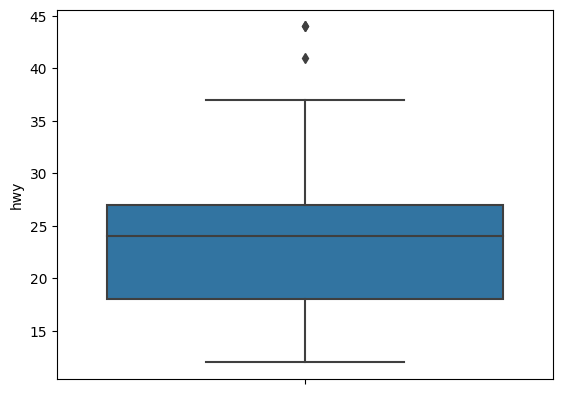

In [ ]:
sns.boxplot(data=mpgo,y='hwy');

In [ ]:
### describe()로 알아볼 수 없을까? testing
mpgo.hwy.describe(), mpgo.hwy.describe()[4], mpgo.hwy.describe()[6]

(count    231.000000
 mean      23.186147
 std        5.553297
 min       12.000000
 25%       18.000000
 50%       24.000000
 75%       27.000000
 max       37.000000
 Name: hwy, dtype: float64, 18.0, 27.0)

In [ ]:
# 1사분위수
pct25 = mpgo['hwy'].quantile(.25)
# 3사분위수
pct75 = mpgo['hwy'].quantile(.75)
# IQR 구하기
iqr = pct75 - pct25
pct25, pct75, iqr

(18.0, 27.0, 9.0)

In [ ]:
# 하한, 상한
pct25 - 1.5*iqr, pct75 + 1.5*iqr

(4.5, 40.5)

In [ ]:
# 극단치 결측처리
# 4.5 ~ 40.5 벗어나면 NaN 부여
mpgo['hwy'] = np.where((mpgo['hwy'] < pct25-1.5*iqr) |
                       (mpgo['hwy'] > pct75+1.5*iqr),
                      np.nan, mpgo['hwy'])
# 결측치 빈도 확인
mpgo['hwy'].isna().sum()

3

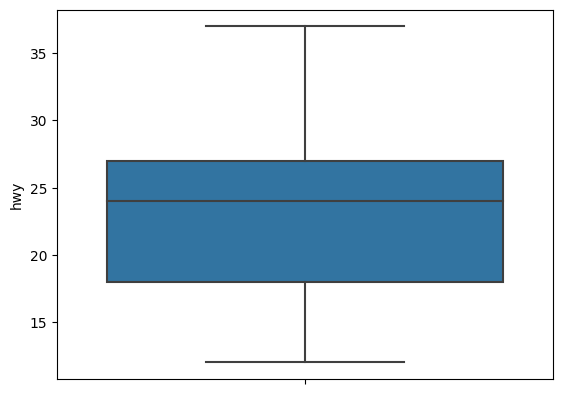

In [ ]:
# 결측치 제거되었는지 확인
sns.boxplot(data=mpgo,y='hwy');

In [ ]:
mpgo.dropna(subset = ['hwy']) \
   .groupby('drv') \
   .agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000


In [ ]:
# 384p
mpgp = pd.read_csv('/content/drive/MyDrive/001 Work/001_02 실습조교_패스트캠퍼스B2B/220426_아모레퍼시픽/아모레퍼시픽_Python 데이터 분석 과정_강의자료(김영우 강사)/01_data/mpg.csv')
mpgp.loc[[9, 13, 57, 92], 'drv'] = 'k'                # drv 이상치 할당
mpgp.loc[[28, 42, 128, 202], 'cty'] = [3, 4, 39, 42]  # cty 이상치 할당

In [ ]:
# Q1. 이상치 확인
mpgp['drv'].value_counts().sort_index()

4    100
f    106
k      4
r     24
Name: drv, dtype: int64

In [ ]:
mpgp['drv']=np.where(mpgp['drv'].isin(['4','f','r']),mpgp['drv'],np.nan)
mpgp['drv'].value_counts().sort_index()

4    100
f    106
r     24
Name: drv, dtype: int64

In [ ]:
pd.isna(mpgp.drv).sum()

4

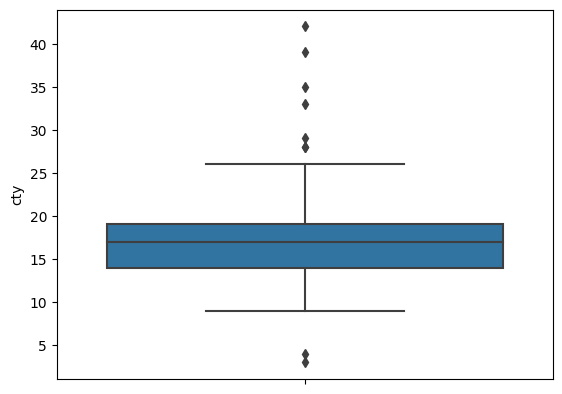

In [ ]:
# Q2.
sns.boxplot(data = mpgp, y ='cty');

In [ ]:
pct25 = mpgp.cty.quantile(.25)
pct75 = mpgp.cty.quantile(0.75)
iqr = pct75-pct25
pct25, pct75, iqr, pct25-1.5*iqr, pct75+1.5*iqr

(14.0, 19.0, 5.0, 6.5, 26.5)

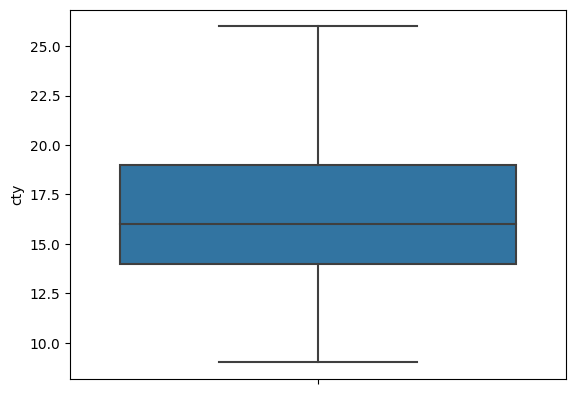

In [ ]:
mpgp['cty']=np.where((mpgp.cty < pct25-1.5*iqr)|(mpgp.cty > pct75+1.5*iqr),
                     np.nan, mpgp['cty'])
sns.boxplot(data = mpgp, y='cty');

In [ ]:
mpgp.dropna(subset=['drv','cty']).groupby('drv')['cty'].mean()

drv
4    14.247423
f    19.470000
r    13.958333
Name: cty, dtype: float64

In [ ]:
mpgp.dropna().groupby('drv')['cty'].mean()

drv
4    14.247423
f    19.470000
r    13.958333
Name: cty, dtype: float64